# Lending Club

> Lending Club Case Study Analysis <br>
Team : Gnanaprakash and Vikas Sharma <br>
Date : 06-09-2023

## Table of Contents
* [Problem Statement](#problem-statement)
   * [Loan Application Decisions](#decisions)
   * [Solution](#solution)
* [Including Necessary Libraries](#libraries)   
* [Data Source](#datasource)
   * [Understanding from source](#source_understanding)
* [Data Cleaning](#datacleaning)
   * [Fixing Missing Values](#fix_missing)
* [Data Analysis](#dataanalysis)
* [Conclusions](#conclusions)

## Problem Statement <a class="anchor" id="problem-statement"></a>

> <font color="blue"> Assumption that we are working in <font color="green"> **consumer finance company** </font> which specialises in lending various types of loans to urban customers. </font>



When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### <font color="brown"> Loan Application Decisions </font> <a class="anchor" id="decisions"></a>
When a person applies for a loan, there are two types of decisions that could be taken by the company:
![Loan Data Set](Loan_Dataset.png)

### <font color="brown"> Solution </font> <a class="anchor" id="solution"></a>
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

<font color="blue"> Will be using Exploratory data analysis(EDA) to understand how **consumer attributes** and **loan attributes** influence the tendency of default. </font>

## Including Necessary Libraries<a class="anchor" id="libraries"></a>

In [447]:
# Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [505]:
import warnings
# if there are any warning due to version mismatch, it will be ignored
warnings.filterwarnings('ignore')
# python version 
from platform import python_version
# To display datafram in table format
from IPython.display import display

In [449]:
# Get all the library versions
print('Library Versions:')
print('Python:',python_version(),'| Numpy:',np.__version__,'| Pandas:',pd.__version__, '| Seaborn:', sns.__version__)

Library Versions:
Python: 3.11.3 | Numpy: 1.24.3 | Pandas: 1.5.3 | Seaborn: 0.12.2


## Data Source <a class="anchor" id="datasource"></a>

The data `loan.csv` given contains information about past loan applicants and whether they `defaulted` or not.

In [450]:
# Loading the CSV file
loan_applicants = pd.read_csv('loan.csv')

In [451]:
# Print the first 5 rows
loan_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [452]:
# Print the last 5 rows
loan_applicants.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [453]:
# Number of rows and columns
print('Dataframe Shape:', loan_applicants.shape)

Dataframe Shape: (39717, 111)


In [454]:
# Get Number of Invalid information from the source
loan_applicants.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [455]:
# Total number of columns data which are completely invalid
print(f'Number of Columns has mostly invalid dats: {sum(loan_applicants.isnull().sum() == rows)}')

Number of Columns has mostly invalid dats: 54


In [456]:
loan_applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### <font color="brown">Understanding from Source:</font>  <a class="anchor" id="source_understanding"></a>
- Data source are consider as ***private*** data and belongs to ***consumer finance company***.
- There are ***39717 rows***  and ***111 columns*** present.
- There are ***54 columns*** data that are completely invalid
- There is ***no partial*** missing data in columns

## Data Cleaning <a class="anchor" id="datacleaning"></a>

### <font color="brown">Fixing Missing Values:</font>  <a class="anchor" id="fix_missing"></a>

In [457]:
# Droping more than 80% data of column/row is invalid
limit_percentage = 0.80
row_nadata_limit = 0
col_nadata_limit = 0

In [458]:
rows = 0
columns = 0
# To update the rows, columns, invalid_data_limit and print the updated rows and columns
# Param: Dataframe to get rows and columns of it
def load_n_print_dimensions(data_frame):
    global rows, columns, limit_percentage, col_nadata_limit, row_nadata_limit

    rows = len(data_frame.axes[0])
    columns = len(data_frame.axes[1])
    col_nadata_limit = rows * limit_percentage
    row_nadata_limit = columns * limit_percentage

    print(f'Rows: {rows} Columns: {columns}')

load_n_print_dimensions(loan_applicants)
print(col_nadata_limit, row_nadata_limit)

Rows: 39717 Columns: 111
31773.600000000002 88.80000000000001


In [459]:
# Drop columns that contains all value as NaN
loan_applicants.dropna(axis='columns', inplace=True, thresh=col_nadata_limit)
print('Dropped >=80% Invalid data on columns :-', end="")
load_n_print_dimensions(loan_applicants)

# Drop rows that contains all value as NaN
loan_applicants.dropna(axis='rows', inplace=True, thresh=row_nadata_limit)

print('Dropped >=80% Invalid data on rows :-', end="")
load_n_print_dimensions(loan_applicants)

# Droping columns where the unique value is only one
loan_applicants.drop(loan_applicants.loc[:,loan_applicants.apply(pd.Series.nunique) <= 1], axis=1, inplace=True)
print('Dropped <=1 Unique values :-', end="")
load_n_print_dimensions(loan_applicants)

Dropped >=80% Invalid data on columns :-Rows: 39717 Columns: 53
Dropped >=80% Invalid data on rows :-Rows: 39717 Columns: 53
Dropped <=1 Unique values :-Rows: 39717 Columns: 44


In [460]:
# Checking to fix missing data
loan_applicants.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [461]:
# Fix Job Title as 'Unknown' for data which are not provided
print(loan_applicants.emp_title.unique())
loan_applicants.emp_title.fillna('Unknown', inplace=True)

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']


In [462]:
# Print the first 5 rows
loan_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


## Data Analysis <a class="anchor" id="dataanalysis"></a>

In [463]:
loan_applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                39717 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

<font color="blue">Based on analysing the info, we see only int64,float64, few are in object.
So, Checking object values are convertible to possible values to calculate metrics. </font>

In [464]:
# Datatypes of all the columns
datatypes = loan_applicants.dtypes
columns_df =  loan_applicants.columns
idx=0 
for each, col in zip(datatypes,columns_df):
    if str(each) == "object":
        print("#####", col, ':', each)
        print(loan_applicants[col].head(5))

##### term : object
0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
##### int_rate : object
0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object
##### grade : object
0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object
##### sub_grade : object
0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object
##### emp_title : object
0                     Unknown
1                       Ryder
2                     Unknown
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object
##### emp_length : object
0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object
##### home_ownership : object
0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object
##### verification_status : object
0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    So

<font color="blue">Based on analysing the object type columns</font>
- **Columns in %:**
  - int_rate
  - revol_util
- **Columns in (month-year):**
  - issue_d
  - earliest_cr_line
  - last_pymnt_d
  - initial_list_status

In [465]:
# Convert All percentage in object type to float type
loan_applicants['int_rate_p'] = loan_applicants['int_rate'].apply(lambda y: y.split('%')[0]).astype(float)
# Filling the revol_util NaN with Median
rev_median = loan_applicants['revol_util'].str.replace('%', '').median()
loan_applicants['revol_util'] = loan_applicants['revol_util'].fillna(f'{rev_median}%')
# Convert All percentage in object type to float type
loan_applicants['revol_util_p'] = loan_applicants['revol_util'].apply(lambda y: y.split('%')[0]).astype(float)

In [466]:
# Convert All Month-Year object type to Date Time format
loan_applicants['issue_d'] = loan_applicants['issue_d'].str.replace('-','-19')
loan_applicants['earliest_cr_line'] = loan_applicants['earliest_cr_line'].str.replace('-','-19')
loan_applicants['last_pymnt_d'] = loan_applicants['last_pymnt_d'].str.replace('-','-19')

loan_applicants['issue_d'] = pd.to_datetime(loan_applicants['issue_d'], format='%b-%Y')
loan_applicants['earliest_cr_line'] = pd.to_datetime(loan_applicants['earliest_cr_line'], format='%b-%Y')
loan_applicants['last_pymnt_d'] = pd.to_datetime(loan_applicants['last_pymnt_d'], format='%b-%Y')

In [467]:
loan_applicants.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,int_rate_p,revol_util_p
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260,12.021177,48.832741
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324,3.724825,28.314798
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.420000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,9.250000,25.500000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,11.860000,49.300000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,14.590000,72.300000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,24.590000,99.900000


### <font color="brown">Univarient Analysis - Column 'Loan_status' value 'Charged Off' refers to `defaulted` for the applicant</font>  <a class="anchor" id="incorrect_datatype"></a>


In [522]:
# Analysing driving factor for Defaulted which is - 'Charged Off' in loan_status
print(f'Unique values in loan_status: {loan_applicants["loan_status"].unique()}')
print('\nDescribe each loan_status:')
for each in loan_applicants["loan_status"].unique():
    print('\n#----',each,'----#')
    print(loan_applicants.loan_amnt[loan_applicants["loan_status"] == each].describe())

Unique values in loan_status: ['Fully Paid' 'Charged Off' 'Current']

Describe each loan_status:

#---- Fully Paid ----#
count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#---- Charged Off ----#
count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#---- Current ----#
count     1140.000000
mean     17053.991228
std       8651.052316
min       1000.000000
25%      12000.000000
50%      15825.000000
75%      23000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


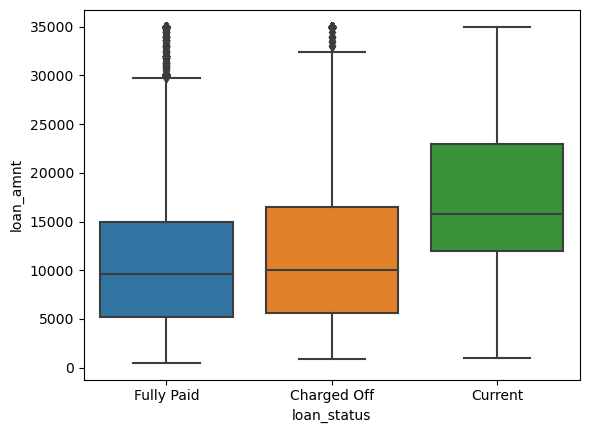

In [498]:
# Show Box plot representation for loan_status column vs loan_amnt column
sns.boxplot(x="loan_status", y="loan_amnt", data=loan_applicants);

In [523]:
# Adding a new column defaulted and marking 'True' for 'Charged Off'
loan_applicants['defaulted'] = loan_applicants["loan_status"].str.contains('Charged Off')
loan_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_p,revol_util_p,defaulted
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,1915-01-01,171.62,May-16,0.0,10.65,83.7,False
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,1913-04-01,119.66,Sep-13,0.0,15.27,9.4,True
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,1914-06-01,649.91,May-16,0.0,15.96,98.5,False
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,1915-01-01,357.48,Apr-16,0.0,13.49,21.0,False
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,1916-05-01,67.79,May-16,0.0,12.69,53.9,False


In [524]:
loan_applicants['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Conclusions <a class="anchor" id="conclusions"></a>